In [2]:
# Importar Librerias

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
Datos = pd.read_csv('./heart_cleveland_upload.csv') # Se carga la base de datos 
Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
# Muestra la información de la base de datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Cantidad de Registros con cero en Resultado electrocardiograma:  147
Cantidad de Registros con cero en Depresión:  96
Cantidad de Registros con cero en Pendiente test de depresión:  139
Cantidad de Registros con cero en Número de vasos principales:  174
Cantidad de Registros con cero en Talasemia:  164


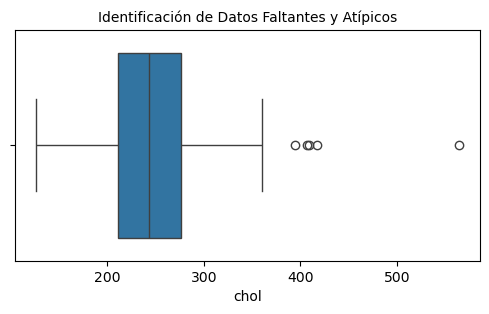

In [5]:
# Creamos una figura
plt.figure(figsize=(6, 3))

# Creamos un grafico para ver la distribucion del colesterol
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

# Observamos la cantidad de registros
print("Cantidad de Registros con cero en Resultado electrocardiograma: ", Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión: ", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Pendiente test de depresión: ", Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de vasos principales: ", Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Talasemia: ", Datos['thal'].isin([0]).sum())

In [6]:
# Reemplazamos los valores en 0 por la media de cada columna
Datos['restecg'] = Datos['restecg'].replace(0, Datos['restecg'].mean())
Datos['oldpeak'] = Datos['oldpeak'].replace(0, Datos['oldpeak'].mean())
Datos['slope'] = Datos['slope'].replace(0, Datos['slope'].mean())
Datos['ca'] = Datos['ca'].replace(0, Datos['ca'].mean())
Datos['thal'] = Datos['thal'].replace(0, Datos['thal'].mean())

# Observamos que ya no hay ningún valor en 0 en las columnas de la base de datos
print("Cantidad de Registros con cero en Resultado electrocardiograma: ", Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión: ", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Pendiente test de depresión: ", Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de vasos principales: ", Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Talasemia: ", Datos['thal'].isin([0]).sum())

Cantidad de Registros con cero en Resultado electrocardiograma:  0
Cantidad de Registros con cero en Depresión:  0
Cantidad de Registros con cero en Pendiente test de depresión:  0
Cantidad de Registros con cero en Número de vasos principales:  0
Cantidad de Registros con cero en Talasemia:  0


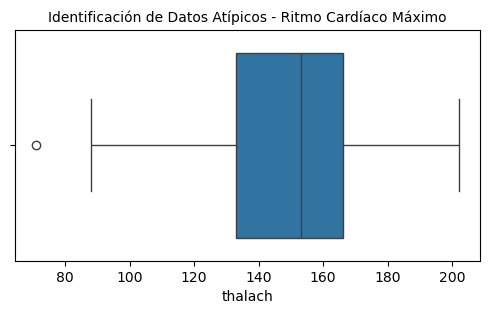

In [7]:
# Creamos un gráfico para observar la distribución de la variable Ritmo cardíaco máximo
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos - Ritmo Cardíaco Máximo', fontsize=10)
plt.show()

In [8]:
# Definimos los niveles mínimo y máximo del ritmo cardíaco
nivel_minimo = 100
nivel_maximo = 200

# Observamos la cantidad de datos atípicos en la variable Ritmo cardíaco máximo
Total_Atipicos = ((Datos['thalach'] < nivel_minimo) | (Datos['thalach'] > nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 9


In [9]:
# Eliminamos los datos atípicos
Datos = Datos[(Datos['thalach'] < nivel_maximo) & (Datos['thalach'] > nivel_minimo)]

# Verificamos el tamaño del nuevo dataset
print("Tamaño del dataset después de eliminar datos atípicos: ", Datos.shape)

Tamaño del dataset después de eliminar datos atípicos:  (288, 14)


In [10]:
# Observamos nuevamente la cantidad de datos atípicos en la variable Ritmo cardíaco máximo
Total_Atipicos = ((Datos['thalach'] < nivel_minimo) | (Datos['thalach'] > nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [11]:
# Observamos la informacion de la base de datos
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        288 non-null    int64  
 1   sex        288 non-null    int64  
 2   cp         288 non-null    int64  
 3   trestbps   288 non-null    int64  
 4   chol       288 non-null    int64  
 5   fbs        288 non-null    int64  
 6   restecg    288 non-null    float64
 7   thalach    288 non-null    int64  
 8   exang      288 non-null    int64  
 9   oldpeak    288 non-null    float64
 10  slope      288 non-null    float64
 11  ca         288 non-null    float64
 12  thal       288 non-null    float64
 13  condition  288 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.8 KB


In [12]:
# Realizamos un conteo de cada valor de la variable Diagnóstico de enfermedad cardíaca
Datos['condition'].value_counts()

condition
0    158
1    130
Name: count, dtype: int64

In [13]:
# Definimos cuál es la variable dependiente y el conjunto de características
X = Datos.drop('condition', axis=1)
Y = Datos['condition']  

# Dividimos la base de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

# Imprimimos el conjunto de características de entrenamiento
print(X_train)

     age  sex  cp  trestbps  chol  fbs   restecg  thalach  exang   oldpeak  \
131   48    1   2       124   255    1  0.996633      175      0  1.055556   
142   43    0   2       122   213    0  0.996633      165      0  0.200000   
244   54    1   3       124   266    0  2.000000      109      1  2.200000   
26    66    1   1       160   246    0  0.996633      120      1  1.055556   
54    46    1   1       101   197    1  0.996633      156      0  1.055556   
..   ...  ...  ..       ...   ...  ...       ...      ...    ...       ...   
172   65    1   3       120   177    0  0.996633      140      0  0.400000   
267   48    1   3       124   274    0  2.000000      166      0  0.500000   
180   63    0   3       150   407    0  2.000000      154      0  4.000000   
277   45    1   3       142   309    0  2.000000      147      1  1.055556   
233   57    1   3       132   207    0  0.996633      168      1  1.055556   

        slope        ca      thal  
131  0.602694  2.000000  0.

In [14]:
# Imprimimos los datos de la variable dependiente de entrenamiento
print(Y_train)

131    0
142    0
244    1
26     1
54     0
      ..
172    0
267    1
180    1
277    1
233    0
Name: condition, Length: 216, dtype: int64


In [15]:
# Creamos el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train) 

# Realizamos la predicción
Prediccion = modelo_regresion.predict(X_test)

# Imprimimos los valores de la variable dependiente de prueba
print("Valores reales de la variable dependiente en el conjunto de prueba:")
print(Y_test)

Valores reales de la variable dependiente en el conjunto de prueba:
276    0
119    0
253    0
220    1
285    0
      ..
74     1
139    0
110    0
224    1
105    0
Name: condition, Length: 72, dtype: int64


In [16]:
# Mostramos la predicción realizada por el modelo
print("Predicciones realizadas por el modelo:")
print(Prediccion)

Predicciones realizadas por el modelo:
[0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0]


In [17]:
# Imprimimos el informe de clasificación
print("Informe de clasificación:")
print(classification_report(Y_test, Prediccion))

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        39
           1       0.90      0.79      0.84        33

    accuracy                           0.86        72
   macro avg       0.87      0.86      0.86        72
weighted avg       0.86      0.86      0.86        72



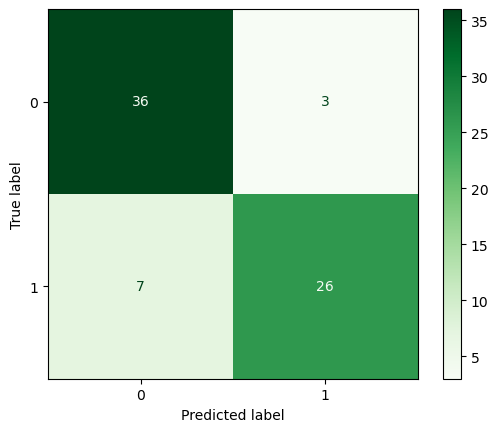

In [27]:
# Creamos la matriz de confusión
cm = confusion_matrix(Y_test, Prediccion)

# Creamos un objeto para mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Greens') 
plt.show()  

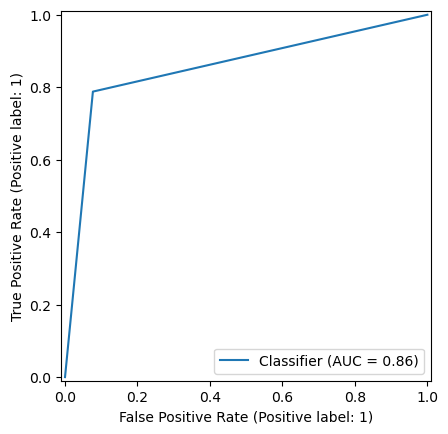

In [28]:
# Creamos la curva ROC
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()